In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
url = "C:/Users/m7moo/Dropbox/My PC (DESKTOP-AVFOVL3)/Downloads/New_Data.csv"
df = pd.read_csv(url)


In [2]:
# Summary statistics
print(df.describe())

       passenger_count  trip_distance    fare_amount          extra  \
count    643019.000000  643019.000000  643019.000000  643019.000000   
mean          1.283247       3.852597      15.903753       0.490449   
std           0.927250       4.486304      14.416081       0.810778   
min           1.000000       0.000000       0.000000       0.000000   
25%           1.000000       1.110000       7.000000       0.000000   
50%           1.000000       2.180000      11.000000       0.000000   
75%           1.000000       4.770000      19.500000       0.500000   
max           9.000000     603.800000     944.980000      11.000000   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  643019.000000  643019.000000  643019.000000          643019.000000   
mean        0.490624       0.855507       0.319202               0.255056   
std         0.067824       1.807703       1.404090               0.107066   
min         0.000000       0.000000       0.000000  

In [3]:
# Display the first few rows of the dataframe
print(df.head())


   passenger_count  trip_distance  fare_amount  extra  mta_tax  tip_amount  \
0              1.0           0.00          3.5    0.5      0.5        1.44   
1              1.0           0.72          5.5    0.5      0.5        1.36   
2              1.0           0.50          4.0    0.5      0.5        0.00   
3              1.0           1.19          6.0    0.5      0.5        1.46   
4              1.0           0.55          4.0    0.5      0.5        0.00   

   tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  \
0           0.0                    0.3          6.24                   0.0   
1           0.0                    0.3          8.16                   0.0   
2           0.0                    0.3          5.30                   0.0   
3           0.0                    0.3          8.76                   0.0   
4           0.0                    0.3          5.30                   0.0   

   ... rate_type_Negotiated fare rate_type_Standard rate rate_

In [4]:
# Get a summary of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643019 entries, 0 to 643018
Data columns (total 35 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   passenger_count                           643019 non-null  float64
 1   trip_distance                             643019 non-null  float64
 2   fare_amount                               643019 non-null  float64
 3   extra                                     643019 non-null  float64
 4   mta_tax                                   643019 non-null  float64
 5   tip_amount                                643019 non-null  float64
 6   tolls_amount                              643019 non-null  float64
 7   improvement_surcharge                     643019 non-null  float64
 8   total_amount                              643019 non-null  float64
 9   congestion_surcharge                      643019 non-null  float64
 10  pu_state            

In [5]:
import pandas as pd

# Assuming df is your DataFrame and it has already been loaded

# Calculate the highest and lowest total amount
highest_total_amount = df['total_amount'].max()
lowest_total_amount = df['total_amount'].min()
average_total_amount = df['total_amount'].mean()

# Define the new bin edges and labels
bin_edges = [0, 20, 50, df['total_amount'].max()]
labels = ['Low', 'Medium', 'High']

# Discretize the total_amount column
df['total_amount_category'] = pd.cut(df['total_amount'], bins=bin_edges, labels=labels, include_lowest=True)

# Encode the categories with values 0, 1, 2
encoding = {'Low': 0, 'Medium': 1, 'High': 2}
df['total_amount_category'] = df['total_amount_category'].replace(encoding)

# Reorder columns to place total_amount_category after total_amount
cols = df.columns.tolist()
total_amount_index = cols.index('total_amount')
cols.insert(total_amount_index + 1, cols.pop(cols.index('total_amount_category')))
df = df[cols]

# Print the highest and lowest total amount
print(f"Highest total amount: {highest_total_amount}")
print(f"Lowest total amount: {lowest_total_amount}")
print(f"Average total amount: {average_total_amount}")

# Print the range for each category
for i, label in enumerate(labels):
    lower_bound = bin_edges[i]
    upper_bound = bin_edges[i + 1]
    print(f"Range for {label}: {lower_bound} to {upper_bound}")

# Print number of customers in each category
print("\nNumber of customers in each category:")
print(df['total_amount_category'].value_counts())


Highest total amount: 944.98
Lowest total amount: 0.0
Average total amount: 18.59595662026414
Range for Low: 0 to 20
Range for Medium: 20 to 50
Range for High: 50 to 944.98

Number of customers in each category:
0    453115
1    154790
2     35114
Name: total_amount_category, dtype: int64


In [6]:
# Print the total number of occurrences for each category
category_counts = df['total_amount_category'].value_counts()
print("\nTotal number of occurrences for each category:")
print(category_counts)


Total number of occurrences for each category:
0    453115
1    154790
2     35114
Name: total_amount_category, dtype: int64


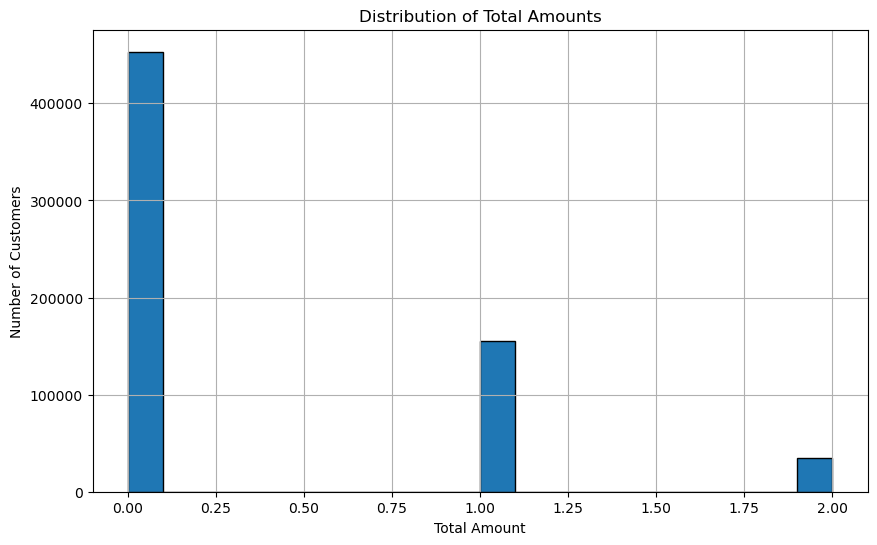

In [7]:
# Visualize the data
plt.figure(figsize=(10, 6))
plt.hist(df['total_amount_category'], bins=20, edgecolor='black')
plt.title('Distribution of Total Amounts')
plt.xlabel('Total Amount')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

In [8]:
# Extract features from datetime columns
df['pickup_date'] = pd.to_datetime(df['pickup_date'])
df['dropoff_date'] = pd.to_datetime(df['dropoff_date'])
df['pickup_time'] = pd.to_datetime(df['pickup_time'])
df['dropoff_time'] = pd.to_datetime(df['dropoff_time'])

df['pickup_hour'] = df['pickup_time'].dt.hour
df['dropoff_hour'] = df['dropoff_time'].dt.hour
df['pickup_day_of_week'] = df['pickup_date'].dt.dayofweek
df['dropoff_day_of_week'] = df['dropoff_date'].dt.dayofweek
# Convert time durations to seconds
df['trip_duration_seconds'] = pd.to_timedelta(df['trip_duration']).dt.total_seconds()

# Drop original datetime columns
df = df.drop(columns=['pickup_date', 'dropoff_date', 'pickup_time', 'dropoff_time'])


In [9]:
# Display the first few rows of the dataframe
print(df.head())

   passenger_count  trip_distance  fare_amount  extra  mta_tax  tip_amount  \
0              1.0           0.00          3.5    0.5      0.5        1.44   
1              1.0           0.72          5.5    0.5      0.5        1.36   
2              1.0           0.50          4.0    0.5      0.5        0.00   
3              1.0           1.19          6.0    0.5      0.5        1.46   
4              1.0           0.55          4.0    0.5      0.5        0.00   

   tolls_amount  improvement_surcharge  total_amount total_amount_category  \
0           0.0                    0.3          6.24                     0   
1           0.0                    0.3          8.16                     0   
2           0.0                    0.3          5.30                     0   
3           0.0                    0.3          8.76                     0   
4           0.0                    0.3          5.30                     0   

   ...  payment_type_Missing payment_type_Neither trip_type_Di

In [10]:
# Print all column names
print("Column names:", df.columns.tolist())

Column names: ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'total_amount_category', 'congestion_surcharge', 'pu_state', 'pu_zone', 'do_state', 'do_zone', 'trip_duration', 'pickup_date_label', 'dropoff_date_label', 'vendor_Creative Mobile Technologies, LLC', 'vendor_VeriFone Inc.', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'rate_type_Negotiated fare', 'rate_type_Standard rate', 'rate_type_other', 'payment_type_Cash', 'payment_type_Credit card', 'payment_type_Missing', 'payment_type_Neither', 'trip_type_Dispatch', 'trip_type_Street-hail', 'trip_type_Unknown', 'pickup_hour', 'dropoff_hour', 'pickup_day_of_week', 'dropoff_day_of_week', 'trip_duration_seconds']


In [11]:
# Split data into training and testing sets
X = df.drop(columns=['fare_amount','tip_amount','extra',
                     'mta_tax','tolls_amount','improvement_surcharge',
                   'total_amount_category','pu_state', 'do_state', 'pu_zone', 'do_zone','trip_duration','total_amount'])
y = df['total_amount_category']



In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix




In [13]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643019 entries, 0 to 643018
Data columns (total 24 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   passenger_count                           643019 non-null  float64
 1   trip_distance                             643019 non-null  float64
 2   congestion_surcharge                      643019 non-null  float64
 3   pickup_date_label                         643019 non-null  int64  
 4   dropoff_date_label                        643019 non-null  int64  
 5   vendor_Creative Mobile Technologies, LLC  643019 non-null  int64  
 6   vendor_VeriFone Inc.                      643019 non-null  int64  
 7   store_and_fwd_flag_N                      643019 non-null  int64  
 8   store_and_fwd_flag_Y                      643019 non-null  int64  
 9   rate_type_Negotiated fare                 643019 non-null  int64  
 10  rate_type_Standard r

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# Choose the scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_cv_scaled = scaler.transform(X_cv)
X_test_scaled = scaler.transform(X_test)



# Random Forrests

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has already been loaded

# Calculate the highest and lowest total amount
highest_total_amount = df['total_amount'].max()
lowest_total_amount = df['total_amount'].min()
average_total_amount = df['total_amount'].mean()

# Define new bin edges and labels to create balanced categories
bin_edges = [0, 20, 50, df['total_amount'].max()]
labels = ['Low', 'Medium', 'High']

# Discretize the total_amount column
df['total_amount_category'] = pd.cut(df['total_amount'], bins=bin_edges, labels=labels, include_lowest=True)

# Encode the categories with values 0, 1, 2
encoding = {'Low': 0, 'Medium': 1, 'High': 2}
df['total_amount_category'] = df['total_amount_category'].replace(encoding)

# Reorder columns to place total_amount_category after total_amount
cols = df.columns.tolist()
total_amount_index = cols.index('total_amount')
cols.insert(total_amount_index + 1, cols.pop(cols.index('total_amount_category')))
df = df[cols]

# Print the highest and lowest total amount
print(f"Highest total amount: {highest_total_amount}")
print(f"Lowest total amount: {lowest_total_amount}")
print(f"Average total amount: {average_total_amount}")

# Print the range for each category
for i, label in enumerate(labels):
    lower_bound = bin_edges[i]
    upper_bound = bin_edges[i + 1]
    print(f"Range for {label}: {lower_bound} to {upper_bound}")

# Print number of customers in each category
print("\nNumber of customers in each category:")
print(df['total_amount_category'].value_counts())

# Define features and target variable
X = df.drop(columns=['fare_amount', 'tip_amount', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge',
                     'total_amount_category', 'pu_state', 'do_state', 'pu_zone', 'do_zone', 'trip_duration', 'total_amount'])
y = df['total_amount_category']

# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training, validation, and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_cv_scaled = scaler.transform(X_cv)
X_test_scaled = scaler.transform(X_test)

# Define the evaluation function
def evaluate(model, X, Y):
    y_pred = model.predict(X)
    confusion_mat = confusion_matrix(Y, y_pred)
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    accuracy = accuracy_score(Y, y_pred)
    precision = precision_score(Y, y_pred, average='macro')
    recall = recall_score(Y, y_pred, average='macro')
    f1 = f1_score(Y, y_pred, average='macro')

    print("Accuracy: {:.2f}%".format(accuracy * 100))
    print("Precision: {:.2f}".format(precision * 100))
    print("Recall: {:.2f}".format(recall * 100))
    print("F1-Score: {:.2f}".format(f1 * 100))


Highest total amount: 944.98
Lowest total amount: 0.0
Average total amount: 18.59595662026414
Range for Low: 0 to 20
Range for Medium: 20 to 50
Range for High: 50 to 944.98

Number of customers in each category:
0    453115
1    154790
2     35114
Name: total_amount_category, dtype: int64


Highest total amount: 944.98
Lowest total amount: 0.0
Average total amount: 18.59595662026414
Range for Low: 0 to 20
Range for Medium: 20 to 50
Range for High: 50 to 944.98

Number of customers in each category:
0    453115
1    154790
2     35114
Name: total_amount_category, dtype: int64
The best Parameters are: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
Cross-Validation Evaluation:


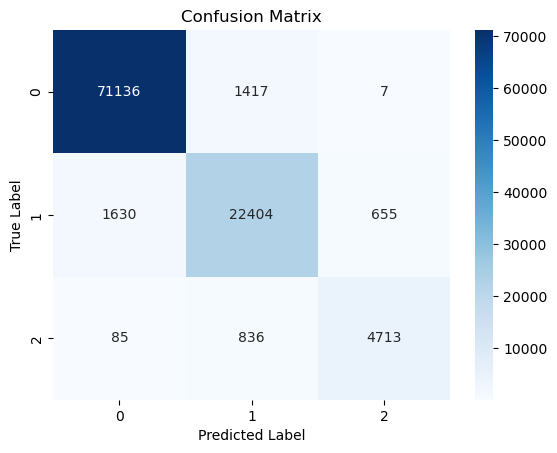

Accuracy: 95.50%
Precision: 92.06
Recall: 90.81
F1-Score: 91.42
Test Set Evaluation:


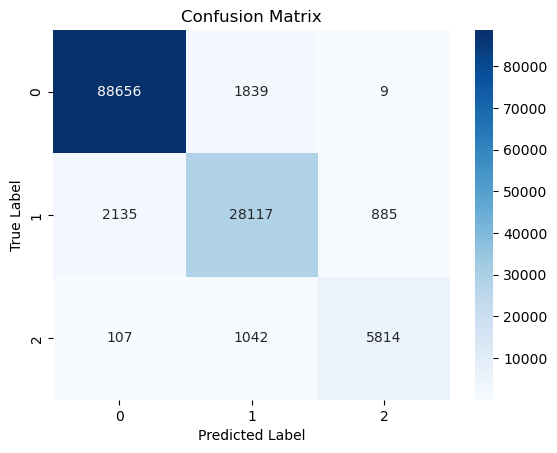

Accuracy: 95.32%
Precision: 91.64
Recall: 90.59
F1-Score: 91.10


In [16]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has already been loaded

# Calculate the highest and lowest total amount
highest_total_amount = df['total_amount'].max()
lowest_total_amount = df['total_amount'].min()
average_total_amount = df['total_amount'].mean()

# Define new bin edges and labels to create balanced categories
bin_edges = [0, 20, 50, df['total_amount'].max()]
labels = ['Low', 'Medium', 'High']

# Discretize the total_amount column
df['total_amount_category'] = pd.cut(df['total_amount'], bins=bin_edges, labels=labels, include_lowest=True)

# Encode the categories with values 0, 1, 2
encoding = {'Low': 0, 'Medium': 1, 'High': 2}
df['total_amount_category'] = df['total_amount_category'].replace(encoding)

# Reorder columns to place total_amount_category after total_amount
cols = df.columns.tolist()
total_amount_index = cols.index('total_amount')
cols.insert(total_amount_index + 1, cols.pop(cols.index('total_amount_category')))
df = df[cols]

# Print the highest and lowest total amount
print(f"Highest total amount: {highest_total_amount}")
print(f"Lowest total amount: {lowest_total_amount}")
print(f"Average total amount: {average_total_amount}")

# Print the range for each category
for i, label in enumerate(labels):
    lower_bound = bin_edges[i]
    upper_bound = bin_edges[i + 1]
    print(f"Range for {label}: {lower_bound} to {upper_bound}")

# Print number of customers in each category
print("\nNumber of customers in each category:")
print(df['total_amount_category'].value_counts())

# Define features and target variable
X = df.drop(columns=['fare_amount', 'tip_amount', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge',
                     'total_amount_category', 'pu_state', 'do_state', 'pu_zone', 'do_zone', 'trip_duration', 'total_amount'])
y = df['total_amount_category']

# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training, validation, and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_cv_scaled = scaler.transform(X_cv)
X_test_scaled = scaler.transform(X_test)

# Define the evaluation function
def evaluate(model, X, Y):
    y_pred = model.predict(X)
    confusion_mat = confusion_matrix(Y, y_pred)
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    accuracy = accuracy_score(Y, y_pred)
    precision = precision_score(Y, y_pred, average='macro')
    recall = recall_score(Y, y_pred, average='macro')
    f1 = f1_score(Y, y_pred, average='macro')

    print("Accuracy: {:.2f}%".format(accuracy * 100))
    print("Precision: {:.2f}".format(precision * 100))
    print("Recall: {:.2f}".format(recall * 100))
    print("F1-Score: {:.2f}".format(f1 * 100))

# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)

# Define a smaller hyperparameter grid for fine-tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train_scaled, y_train)

# Get the best model
model = random_search.best_estimator_
print("The best Parameters are:", random_search.best_params_)

# Evaluate the model on the cross-validation set
print("Cross-Validation Evaluation:")
evaluate(model, X_cv_scaled, y_cv)

# Evaluate the model on the test set
print("Test Set Evaluation:")
evaluate(model, X_test_scaled, y_test)



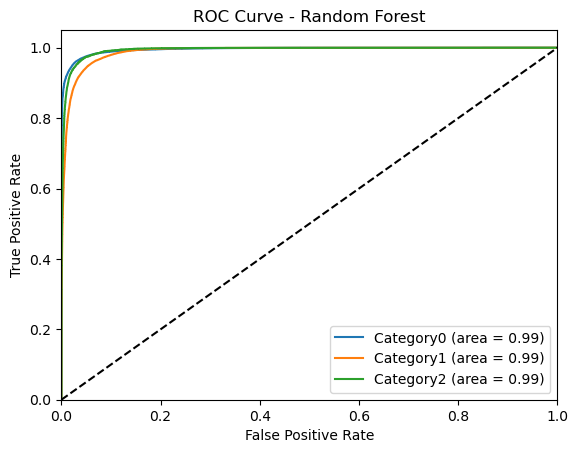

In [47]:
y_test_proba = model.predict_proba(X_test_scaled)
fpr = {}
tpr = {}
roc_auc = {}

for i in range(3):  # assuming 3 classes (Low, Medium, High)
    fpr[i], tpr[i], _ = roc_curve(y_test, y_test_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Category{i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()


# Naive Bayes

Naive Bayes Model Evaluation:
Cross-Validation Evaluation:


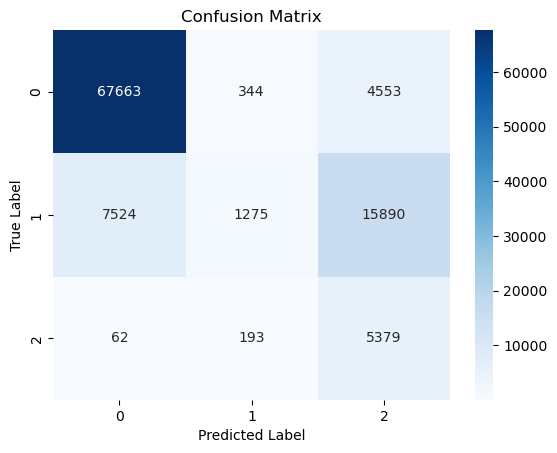

Accuracy: 72.23%
Precision: 60.37
Recall: 64.63
F1-Score: 45.13
Test Set Evaluation:


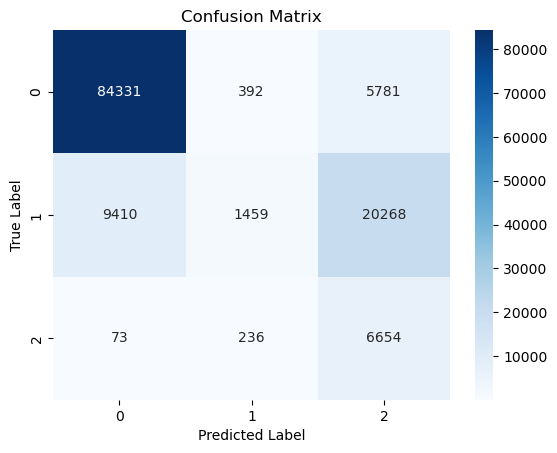

Accuracy: 71.88%
Precision: 60.05
Recall: 64.48
F1-Score: 44.61


In [43]:
print("Naive Bayes Model Evaluation:")
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

print("Cross-Validation Evaluation:")
evaluate(nb_model, X_cv_scaled, y_cv)

print("Test Set Evaluation:")
evaluate(nb_model, X_test_scaled, y_test)

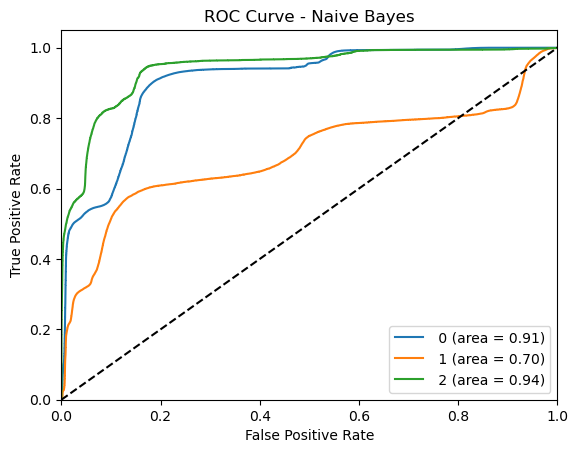

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
y_test_proba = nb_model.predict_proba(X_test_scaled)
fpr = {}
tpr = {}
roc_auc = {}

for i in range(3):  # assuming 3 classes (Low, Medium, High)
    fpr[i], tpr[i], _ = roc_curve(y_test, y_test_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f' {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

# Logistic Regression

Logistic Regression Model Evaluation:


C:\Users\m7moo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\m7moo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\m7moo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\m7moo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

The best Parameters are: {'C': 10.0, 'penalty': 'l2'}
Cross-Validation Evaluation:


C:\Users\m7moo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


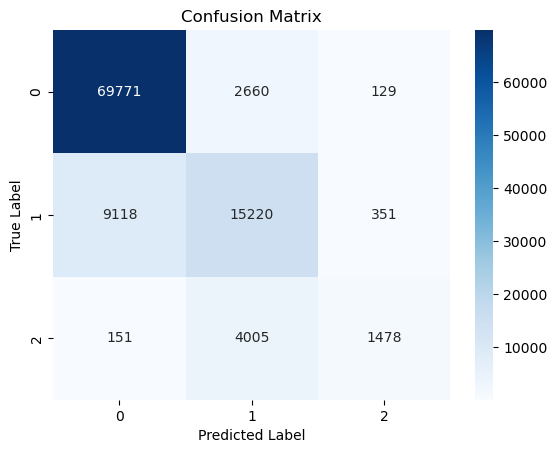

Accuracy: 84.05%
Precision: 77.77
Recall: 61.35
F1-Score: 65.45
Test Set Evaluation:


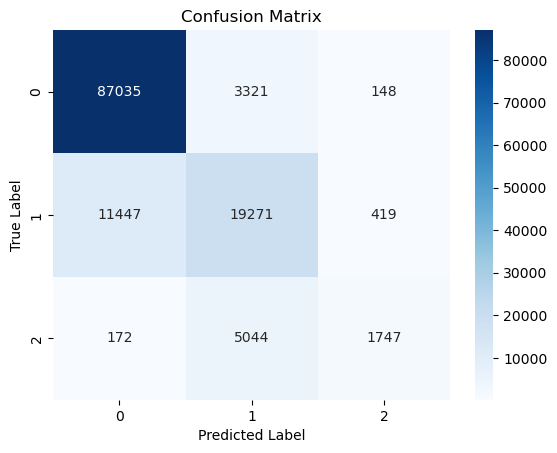

Accuracy: 84.02%
Precision: 77.82
Recall: 61.05
F1-Score: 65.09


In [49]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV



# Logistic Regression with Grid Search for hyperparameter tuning
print("Logistic Regression Model Evaluation:")


param_grid = {
    'penalty': ['l1','l2'],  
    'C': [0.1, 1.0, 10.0],  # Reduced range of regularization strength
}

lr_model = LogisticRegression(random_state=42)

# Perform grid search
grid_search = GridSearchCV(lr_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_lr_model = grid_search.best_estimator_
print("The best Parameters are:", grid_search.best_params_)

# Evaluate the model
print("Cross-Validation Evaluation:")
evaluate(best_lr_model, X_cv_scaled, y_cv)

print("Test Set Evaluation:")
evaluate(best_lr_model, X_test_scaled, y_test)


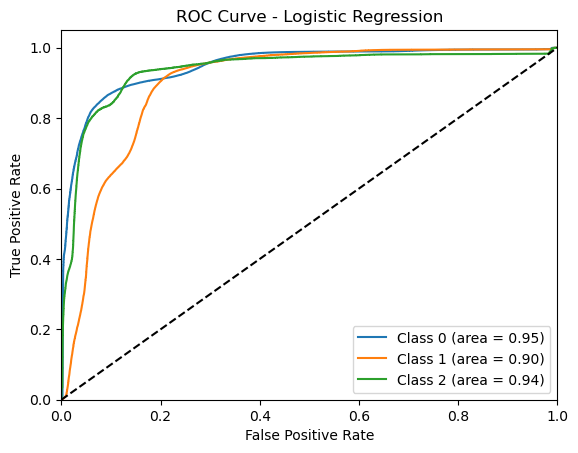

In [50]:
y_test_proba = best_lr_model.predict_proba(X_test_scaled)
fpr = {}
tpr = {}
roc_auc = {}

for i in range(3):  # assuming 3 classes (Low, Medium, High)
    fpr[i], tpr[i], _ = roc_curve(y_test, y_test_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Define the hyperparameter grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

# Perform randomized search with cross-validation
knn_random_search = RandomizedSearchCV(knn_model, knn_param_grid, n_iter=10, cv=5, random_state=42, n_jobs=-1)
knn_random_search.fit(X_train_scaled, y_train)

# Get the best model
knn_best_model = knn_random_search.best_estimator_
print("The best Parameters for KNN are:", knn_random_search.best_params_)

# Evaluate the model on the cross-validation set
print("KNN Cross-Validation Evaluation:")
evaluate(knn_best_model, X_cv_scaled, y_cv)

# Evaluate the model on the test set
print("KNN Test Set Evaluation:")
evaluate(knn_best_model, X_test_scaled, y_test)


C:\Users\m7moo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


The best Parameters for KNN are: {'weights': 'uniform', 'n_neighbors': 5}
KNN Cross-Validation Evaluation:


C:\Users\m7moo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


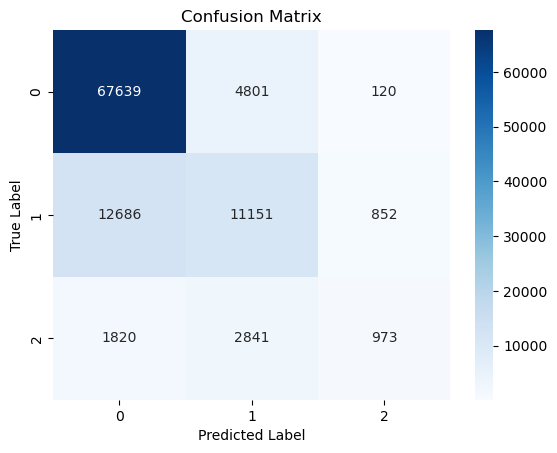

Accuracy: 77.53%
Precision: 63.90
Recall: 51.88
F1-Score: 54.80
KNN Test Set Evaluation:


C:\Users\m7moo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


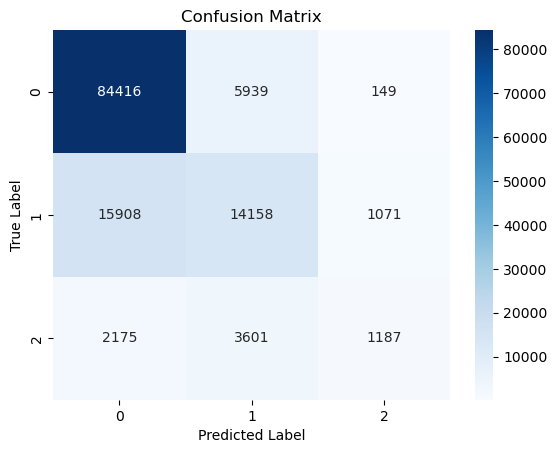

Accuracy: 77.57%
Precision: 63.81
Recall: 51.93
F1-Score: 54.82


In [18]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Defined a simpler hyperparameter grid for KNN to speed up the process
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

# Used a smaller subset of the training data for hyperparameter tuning
subset_size = 5000  
X_train_subset, _, y_train_subset, _ = train_test_split(X_train_scaled, y_train, train_size=subset_size, random_state=42)

# Perform randomized search with cross-validation
knn_random_search = RandomizedSearchCV(knn_model, knn_param_grid, n_iter=5, cv=3, random_state=42, n_jobs=-1)
knn_random_search.fit(X_train_subset, y_train_subset)

# Get the best model
knn_best_model = knn_random_search.best_estimator_
print("The best Parameters for KNN are:", knn_random_search.best_params_)

# Evaluate the model on the cross-validation set
print("KNN Cross-Validation Evaluation:")
evaluate(knn_best_model, X_cv_scaled, y_cv)

# Evaluate the model on the test set
print("KNN Test Set Evaluation:")
evaluate(knn_best_model, X_test_scaled, y_test)


The best Parameters for Decision Tree are: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'criterion': 'entropy'}
Decision Tree Cross-Validation Evaluation:


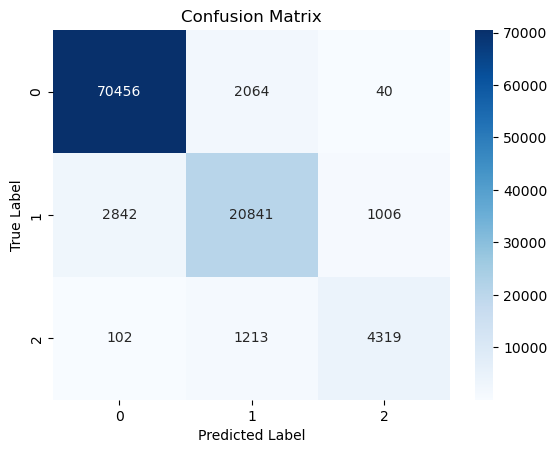

Accuracy: 92.94%
Precision: 87.64
Recall: 86.06
F1-Score: 86.83
Decision Tree Test Set Evaluation:


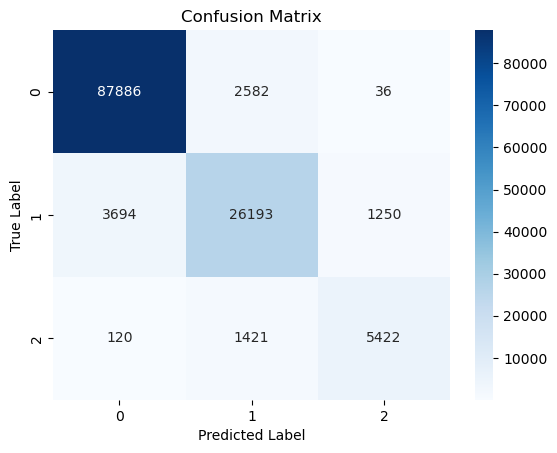

Accuracy: 92.92%
Precision: 87.80
Recall: 86.37
F1-Score: 87.07


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid for Decision Trees
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Used a smaller subset of the training data since it was taking too long
subset_size = 5000 
X_train_subset, _, y_train_subset, _ = train_test_split(X_train_scaled, y_train, train_size=subset_size, random_state=42)

# Perform randomized search with cross-validation
dt_random_search = RandomizedSearchCV(dt_model, dt_param_grid, n_iter=5, cv=3, random_state=42, n_jobs=-1)
dt_random_search.fit(X_train_subset, y_train_subset)

# Get the best model
dt_best_model = dt_random_search.best_estimator_
print("The best Parameters for Decision Tree are:", dt_random_search.best_params_)

# Evaluate the model on the cross-validation set
print("Decision Tree Cross-Validation Evaluation:")
evaluate(dt_best_model, X_cv_scaled, y_cv)

# Evaluate the model on the test set
print("Decision Tree Test Set Evaluation:")
evaluate(dt_best_model, X_test_scaled, y_test)



ROC Curve for KNN


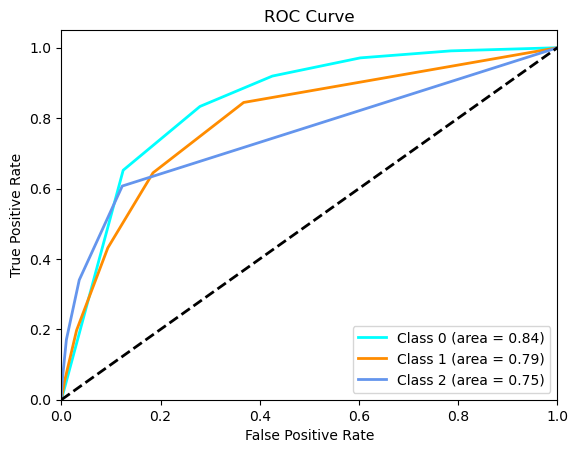

ROC Curve for Decision Tree


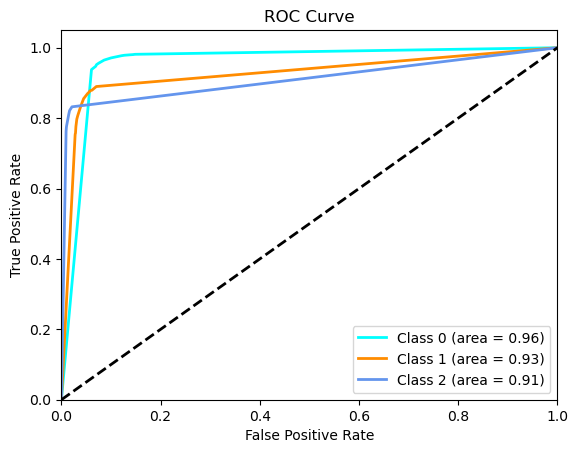

In [19]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

def plot_roc_curve(model, X_test, y_test, n_classes):
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
    y_score = model.predict_proba(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    colors = ['aqua', 'darkorange', 'cornflowerblue']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='Class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC Curve for KNN
print("ROC Curve for KNN")
plot_roc_curve(knn_best_model, X_test_scaled, y_test, n_classes=3)

# Plot ROC Curve for Decision Tree
print("ROC Curve for Decision Tree")
plot_roc_curve(dt_best_model, X_test_scaled, y_test, n_classes=3)


# Conclusion